#Análise de bases bibliográficas
## Esse documento é um estudo para a comparação entre a primeira e segunda análise bibliográfica.

###Primeiro é necessário inserir os artigos da primeira análise bibliográfica.

####Importar o Excel

#### Baixa os pacotes necessários.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [17]:
!pip install venny4py

from venny4py.venny4py import *

#### Precisa fazer os uploads dos documentos:
* Base_WOS_parsifal.xlsx
* Base_Scopus_parsifal.xlsx
* Base_WOS_Agregada.xlsx
* Base_Scopus_Agregada.xlsx
###### Caminho local: D:\Mestrado\Dissertação\Análise bibliométrica\JabRef\Segunda Tentativa\Análise bibliométrica pré-qualificação

In [34]:
# Caminho para o seu arquivo Excel, precisa fazer upload do Excel toda vez
arquivo_excel_00 = "/content/Base_WOS_Agregada_1.xlsx"
arquivo_excel_01 = "/content/Base_Scopus_Agregada.xlsx"

# Carregar o Excel em um DataFrame
df00 = pd.read_excel(arquivo_excel_00)
df01 = pd.read_excel(arquivo_excel_01)

# Exibir as primeiras linhas do DataFrame
print(df00.head())
print(df01.head())

   BibliographyType  ISBN  Identifier  \
0                10   NaN         NaN   
1                 7   NaN         NaN   
2                 7   NaN         NaN   
3                 7   NaN         NaN   
4                 7   NaN         NaN   

                                              Author  \
0                                                NaN   
1                                 Ozili, Peterson K.   
2                        Sarma, Mandira; Pais, Jesim   
3  Allen, Franklin; Demirguc-Kunt, Asli; Klapper,...   
4                      Gabor, Daniela; Brooks, Sally   

                                               Title  \
0                                                NaN   
1  Impact of digital finance on financial inclusi...   
2                Financial Inclusion and Development   
3  The foundations of financial inclusion: Unders...   
4  The digital revolution in financial inclusion:...   

                                Journal  Volume Number     Month     Pages  \
0

####Lê as abas do Excel

In [36]:
#WOS
df00_fi = pd.read_excel(arquivo_excel_00, sheet_name="savedrecs_02 02 2024_fin_compil")
df00_fintech = pd.read_excel(arquivo_excel_00, sheet_name="savedrecs_02 02 2024_fin_tech")
#df00_fi_theory = pd.read_excel(arquivo_excel_00, sheet_name="savedrecs_04 04 2024_fin_theory")
df00_met = pd.read_excel(arquivo_excel_00, sheet_name="savedrecs_03 05 2024_metodologi")
#df00_inst = pd.read_excel(arquivo_excel_00, sheet_name="savedrecs_06 05 2024_instant_fa")
df00_07 = pd.read_excel(arquivo_excel_00, sheet_name="savedrecs_07 05 2024")

#Scopus
df01_fi = pd.read_excel(arquivo_excel_01, sheet_name="scopus_01 02 2024")
df01_fi_fintech = pd.read_excel(arquivo_excel_01, sheet_name="scopus_04 04 2024")
df01_met = pd.read_excel(arquivo_excel_01, sheet_name="scopus_03 05 2024_metodologia")
df01_07 = pd.read_excel(arquivo_excel_01, sheet_name="scopus_07 05 2024")

In [38]:
# prompt: count the lines of the dataframe


print('df00:', len(df00))
print('df01:', len(df01))

print('df00_fi:', len(df00_fi))
print('df00_fintech:', len(df00_fintech))
print('df00_met:', len(df00_met))
print('df00_07:', len(df00_07))

print('df01_fi:', len(df01_fi))
print('df01_fi_fintech:', len(df01_fi_fintech))
print('df01_met:', len(df01_met))
print('df01_07:', len(df01_07))


df00: 1001
df01: 4495
df00_fi: 3501
df00_fintech: 830
df00_met: 216
df00_07: 75
df01_fi: 4495
df01_fi_fintech: 247
df01_met: 471
df01_07: 219


In [39]:
#WOS
print(df00_fi.head())
print(df00_fintech.head())
#print(df00_fi_theory.head())
print(df00_met.head())
#print(df00_inst.head())
print(df00_07.head())

#Scopus
print(df01_fi.head())
print(df01_fi_fintech.head())
print(df01_met.head())
print(df01_07.head())

  Publication Type                                            Authors  \
0                J                                       Cho, Bokhyun   
1                J      Dias, João Ferreira; Psico, José Augusto Tomo   
2                C                                     Singh, Supriya   
3                C  Chavan, Apala Lahiri; Arora, Sarit; Kumar, Ana...   
4                J                           Puhazhendhi, Venugopalan   

  Book Authors  Group Authors Book Group Authors  \
0          NaN            NaN                NaN   
1          NaN            NaN                NaN   
2     Aykin, N            NaN                NaN   
3     Aykin, N            NaN                NaN   
4          NaN            NaN                NaN   

                 Researcher Ids                                    ORCIDs  \
0                           NaN                                       NaN   
1                           NaN                                       NaN   
2  Singh, Supriya

### Selecionar a coluna de Titulo para cada base.

In [41]:
#WOS
print(df00_fi.Title.head())
print(df00_fintech.Title.head())
#print(df00_fi_theory.head())
print(df00_met.Title.head())
#print(df00_inst.head())
print(df00_07.Title.head())

#Scopus
print(df01_fi.Title.head())
print(df01_fi_fintech.Title.head())
print(df01_met.Title.head())
print(df01_07.Title.head())


0    Financial System for Economic Growth and Stabi...
1    O desempenho social das instituições de microf...
2    Mobile Remittances: Design for Financial Inclu...
3    How Mobile Money Can Drive Financial Inclusion...
4    Financial Inclusion for Inclusive Growth An In...
Name: Title, dtype: object
0                                                  NaN
1    The digital revolution in financial inclusion:...
2    Price Fluctuations and the Use of Bitcoin: An ...
3    Blockchain, adoption, and financial inclusion ...
4      Sustainability, FinTech and Financial Inclusion
Name: Title, dtype: object
0                                                  NaN
1    Does financial inclusion impact CO<sub>2</sub>...
2    Is financial inclusion good for bank stability...
3    Financial inclusion and stability in MENA: Evi...
4    Does financial literacy improve financial incl...
Name: Title, dtype: object
0                                                  NaN
1                                      

####Combinando os data frames.

In [42]:
# Combinar as colunas em um único DataFrame - WOS
df_WOS_primeira = pd.concat([df00_fintech.Title,df00_fi.Title,df00_met.Title,df00_07.Title], axis=0, ignore_index=True)

print(df_WOS_primeira.head())

# Combinar as colunas em um único DataFrame - Scopus
df_Scopus_primeira = pd.concat([df01_fi.Title,df01_fi_fintech.Title,df01_met.Title,df01_07.Title], axis=0, ignore_index=True)

print(df_Scopus_primeira.head())

# Renomear colunas
df_WOS_primeira.columns = ["Title"]
df_Scopus_primeira.columns = ["Title"]

# Transformar a Series em DataFrame
df_WOS_primeira = df_WOS_primeira.to_frame(name="Title")
df_Scopus_primeira = df_Scopus_primeira.to_frame(name="Title")

print(df_WOS_primeira.head())
print(df_Scopus_primeira.head())


0                                                  NaN
1    The digital revolution in financial inclusion:...
2    Price Fluctuations and the Use of Bitcoin: An ...
3    Blockchain, adoption, and financial inclusion ...
4      Sustainability, FinTech and Financial Inclusion
Name: Title, dtype: object
0    Digital financial inclusion and income inequal...
1    Transition towards environmental sustainabilit...
2    Neighbourhood social capital, account usage an...
3    Legal and regulatory framework for mobile bank...
4    Digital financial inclusion and corporate inve...
Name: Title, dtype: object
                                               Title
0                                                NaN
1  The digital revolution in financial inclusion:...
2  Price Fluctuations and the Use of Bitcoin: An ...
3  Blockchain, adoption, and financial inclusion ...
4    Sustainability, FinTech and Financial Inclusion
                                               Title
0  Digital financial incl

#### Tira os espaços no início e as linhas 'NaN'.

In [43]:
# Remover apenas os espaços no início
df_WOS_primeira["Title"] = df_WOS_primeira["Title"].str.lstrip()
df_Scopus_primeira["Title"] = df_Scopus_primeira["Title"].str.lstrip()

# Remover apenas os espaços no final
df_WOS_primeira["Title"] = df_WOS_primeira["Title"].str.rstrip()
df_Scopus_primeira["Title"] = df_Scopus_primeira["Title"].str.rstrip()

# Tira as linhas 'NaN'

df_WOS_primeira = df_WOS_primeira.dropna(subset=["Title"])
df_Scopus_primeira = df_Scopus_primeira.dropna(subset=["Title"])

print(df_WOS_primeira.head())
print(df_Scopus_primeira.head())

                                               Title
1  The digital revolution in financial inclusion:...
2  Price Fluctuations and the Use of Bitcoin: An ...
3  Blockchain, adoption, and financial inclusion ...
4    Sustainability, FinTech and Financial Inclusion
5  Fintech, financial inclusion and income inequa...
                                               Title
0  Digital financial inclusion and income inequal...
1  Transition towards environmental sustainabilit...
2  Neighbourhood social capital, account usage an...
3  Legal and regulatory framework for mobile bank...
4  Digital financial inclusion and corporate inve...


### Comparar as bases.

In [44]:
# Conta valores únicos nas bases
df_WOS_count = df_WOS_primeira["Title"].unique()
df_Scopus_count = df_Scopus_primeira["Title"].unique()

print(f"Valores únicos na base WOS: {len(df_WOS_count)}")
print(f"Valores únicos na base Scopus: {len(df_Scopus_count)}")

Valores únicos na base WOS: 3706
Valores únicos na base Scopus: 4417


In [45]:
# Encontrar títulos iguais usando numpy
titulos_iguais_primeira = np.intersect1d(df_WOS_count, df_Scopus_count)

# Contar quantos títulos são iguais
numero_titulos_iguais_primeira = len(titulos_iguais_primeira)

print(f"Número de títulos iguais: {numero_titulos_iguais_primeira}")


Número de títulos iguais: 1766


### Gráfico de Venn

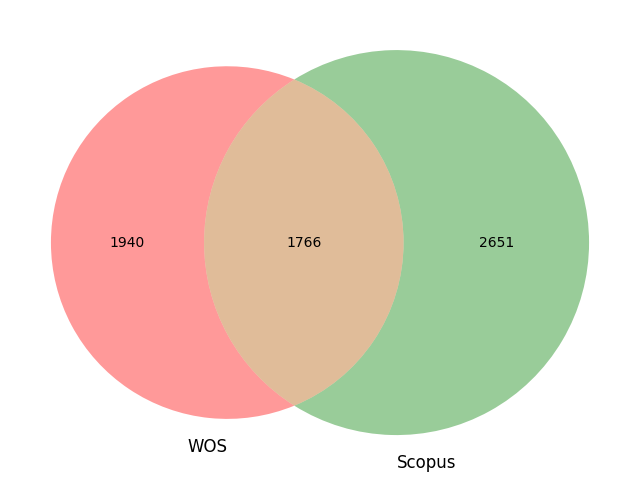

In [46]:
# Converter colunas em conjuntos de títulos únicos
set00 = set(df_WOS_primeira["Title"])
set01 = set(df_Scopus_primeira["Title"])

# Criar o gráfico de Venn
plt.figure(figsize=(8, 8))
venn2([set00, set01], set_labels=('WOS', 'Scopus'))

# Mostrar o gráfico
plt.show()


### Ver os artigos de intersecção e fora dela.

In [47]:
# Interseção completa
intersecao_p = set00 & set01

# Exclusivos de cada conjunto
exclusivo_WOS_Primeira = set00 - set01
exclusivo__Scopus_Primeira = set01 - set00

# Elementos fora da interseção completa
fora_da_intersecao_p = (set00 | set01) - intersecao_p

# Função para exibir títulos numerados
def mostrar_titulos_numerados(titulos, categoria):
    print(f"{categoria}:")
    for i, titulo in enumerate(titulos, 1):
        print(f"{i}. {titulo}")
    print()

# Exibir os resultados numerados
mostrar_titulos_numerados(intersecao_p, "Títulos na interseção")
mostrar_titulos_numerados(exclusivo_WOS_Primeira, "Títulos exclusivos da primeira análise de bibliográfica")
mostrar_titulos_numerados(exclusivo__Scopus_Primeira, "Títulos exclusivos da segunda análise de bibliográfica")
mostrar_titulos_numerados(fora_da_intersecao_p, "Títulos fora da interseção")

# Criar um dicionário com os dados
dados_primeira = {
    "Interseção primeira análise": list(intersecao_p),
    "Exclusivo WOS primeira": list(exclusivo_WOS_Primeira),
    "Exclusivo Scopus primeira": list(exclusivo__Scopus_Primeira),
    "Fora da Interseção": list(fora_da_intersecao_p)
}

# Criar um DataFrame a partir do dicionário
df_resultado_primeira = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in dados_primeira.items()]))

# Exportar para um arquivo Excel
df_resultado_primeira.to_excel("resultado_intersecoes_primeira_análise.xlsx", index=False)

print("Os resultados foram exportados para 'resultado_intersecoes_primeira_análise.xlsx'.")

A saída de streaming foi truncada nas últimas 5000 linhas.
2247. Assessment of financial inclusive policy in Indian economy
2248. INSURANCE LITERACY, RISK KNOWLEDGE MANAGEMENT, RISK-TAKING PROPENSITY AND ECONOMIC SUSTAINABILITY AMONG SMEs: THE MODERATING EFFECT OF FINANCIAL INCLUSION
2249. Bank Account Ownership and Access Among In-Patients in Psychiatric Care in Berlin, Germany—A Cross-Sectional Patient Survey
2250. The relationship between payment inclusion and the demand for cash; [Związek między inkluzją płatniczą a popytem na gotówkę]
2251. Does the owner’s caste affect access to credit for enterprises in India’s unorganized sector?
2252. Determinants and mechanisms of digital financial inclusion development: Based on urban-rural differences
2253. Financial Liberalization, Inequality and Inclusion in Low-Income Countries
2254. Analyzing the progress and prospects of financial inclusion in India
2255. INCLUSIVENESS AND COMPETITIVENESS PERFORMANCE OF DIGITAL FINANCIAL INCLUSION: FRO

# Artigos da segunda análise bibliográfica.

In [49]:
# Caminho para o seu arquivo Excel, precisa fazer upload do Excel toda vez
arquivo_excel_10 = "/content/Base_WOS_parsifal.xlsx"
arquivo_excel_11 = "/content/Base_Scopus_parsifal.xlsx"

# Carregar o Excel em um DataFrame
df10 = pd.read_excel(arquivo_excel_10)
df11 = pd.read_excel(arquivo_excel_11)

# Exibir as primeiras linhas do DataFrame
print(df10.head())
print(df11.head())

   BibliographyType               ISBN           Identifier  \
0                 7                NaN  WOS:000255580600004   
1                 6  978-3-642-02766-6  WOS:000269191600054   
2                 7                NaN  WOS:000302477500011   
3                 7                NaN  WOS:000309911300004   
4                 7                NaN  WOS:000311496700004   

                                              Author  \
0                                   Solo, Tova Maria   
1  Medhi, Indrani; Ratan, Aishwarya; Toyama, Kentaro   
2                                Arora, Rashmi Umesh   
3                     Johnson, Susan; Arnold, Steven   
4    Diniz, Eduardo; Birochi, Rene; Pozzebon, Marlei   

                                               Title  \
0  Financial exclusion in Latin America - or the ...   
1  Mobile-Banking Adoption and Usage by Low-Liter...   
2  Financial Inclusion and Human Capital in Devel...   
3  Inclusive Financial Markets: Is Transformation...   
4  T

Lê a aba do Excel

In [50]:
#WOS
df10 = pd.read_excel(arquivo_excel_10, sheet_name="savedrecs")

#Scopus
df11 = pd.read_excel(arquivo_excel_11, sheet_name="scopus")

In [51]:
print(df10.head())
print(df11.head())

   BibliographyType               ISBN           Identifier  \
0                 7                NaN  WOS:000255580600004   
1                 6  978-3-642-02766-6  WOS:000269191600054   
2                 7                NaN  WOS:000302477500011   
3                 7                NaN  WOS:000309911300004   
4                 7                NaN  WOS:000311496700004   

                                              Author  \
0                                   Solo, Tova Maria   
1  Medhi, Indrani; Ratan, Aishwarya; Toyama, Kentaro   
2                                Arora, Rashmi Umesh   
3                     Johnson, Susan; Arnold, Steven   
4    Diniz, Eduardo; Birochi, Rene; Pozzebon, Marlei   

                                               Title  \
0  Financial exclusion in Latin America - or the ...   
1  Mobile-Banking Adoption and Usage by Low-Liter...   
2  Financial Inclusion and Human Capital in Devel...   
3  Inclusive Financial Markets: Is Transformation...   
4  T

### Selecionar a coluna de Titulo para cada base.


In [52]:
print(df10.Title.head())
print(df11.Title.head())

0    Financial exclusion in Latin America - or the ...
1    Mobile-Banking Adoption and Usage by Low-Liter...
2    Financial Inclusion and Human Capital in Devel...
3    Inclusive Financial Markets: Is Transformation...
4    Triggers and barriers to financial inclusion: ...
Name: Title, dtype: object
0    Women and financial education: Evidence, polic...
1    Disruptive technology, mobile money, and finan...
2    Safeguarding Citizen Security and Fostering Ec...
3    FINANCIAL INCLUSION IN BURUNDI: THE USE OF MIC...
4    Foreign direct investment and inclusive financ...
Name: Title, dtype: object


### Transformando os títulos em Data Frame.

In [53]:
# Transformar a Series em DataFrame
df10_Title =df10.Title.to_frame(name="Title")
df11_Title = df11.Title.to_frame(name="Title")

print(df10_Title.head())
print(df11_Title.head())

                                               Title
0  Financial exclusion in Latin America - or the ...
1  Mobile-Banking Adoption and Usage by Low-Liter...
2  Financial Inclusion and Human Capital in Devel...
3  Inclusive Financial Markets: Is Transformation...
4  Triggers and barriers to financial inclusion: ...
                                               Title
0  Women and financial education: Evidence, polic...
1  Disruptive technology, mobile money, and finan...
2  Safeguarding Citizen Security and Fostering Ec...
3  FINANCIAL INCLUSION IN BURUNDI: THE USE OF MIC...
4  Foreign direct investment and inclusive financ...


### Tira os espaços no início e fim e as linhas 'NaN'.

In [54]:
# Remover apenas os espaços no início
df10_Title["Title"] = df10_Title["Title"].str.lstrip()
df11_Title["Title"] = df11_Title["Title"].str.lstrip()

# Remover apenas os espaços no final
df10_Title["Title"] = df10_Title["Title"].str.rstrip()
df11_Title["Title"] = df11_Title["Title"].str.rstrip()

# Tira as linhas 'NaN'

df10_Title = df10_Title.dropna(subset=["Title"])
df11_Title = df11_Title.dropna(subset=["Title"])

print(df10_Title.head())
print(df11_Title.head())

                                               Title
0  Financial exclusion in Latin America - or the ...
1  Mobile-Banking Adoption and Usage by Low-Liter...
2  Financial Inclusion and Human Capital in Devel...
3  Inclusive Financial Markets: Is Transformation...
4  Triggers and barriers to financial inclusion: ...
                                               Title
0  Women and financial education: Evidence, polic...
1  Disruptive technology, mobile money, and finan...
2  Safeguarding Citizen Security and Fostering Ec...
3  FINANCIAL INCLUSION IN BURUNDI: THE USE OF MIC...
4  Foreign direct investment and inclusive financ...


### Compara as bases.

In [55]:
# Conta valores únicos nas bases
df10_WOS_count = df10_Title["Title"].unique()
df11_Scopus_count = df11_Title["Title"].unique()

print(f"Valores únicos na base WOS: {len(df10_WOS_count)}")
print(f"Valores únicos na base Scopus: {len(df11_Scopus_count)}")

Valores únicos na base WOS: 157
Valores únicos na base Scopus: 280


In [56]:
# Encontrar títulos iguais usando numpy
titulos_iguais_parsifal = np.intersect1d(df10_WOS_count, df11_Scopus_count)

# Contar quantos títulos são iguais
numero_titulos_iguais_parsifal = len(titulos_iguais_parsifal)

print(f"Número de títulos iguais: {numero_titulos_iguais_parsifal}")

Número de títulos iguais: 15


### Gráfico de Venn

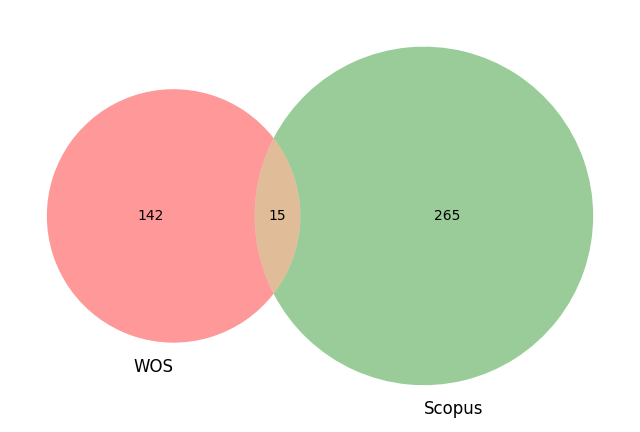

In [57]:
# Converter colunas em conjuntos de títulos únicos
set10 = set(df10_Title["Title"])
set11 = set(df11_Title["Title"])

# Criar o gráfico de Venn
plt.figure(figsize=(8, 8))
venn2([set10, set11], set_labels=('WOS', 'Scopus'))

# Mostrar o gráfico
plt.show()

### Ver a intersecção dos artigos e fora dela.

In [58]:
# Interseção completa
intersecao_s = set10 & set11

# Exclusivos de cada conjunto
exclusivo_WOS_Segunda = set10 - set11
exclusivo_Scopus_Segunda = set11 - set10

# Elementos fora da interseção completa
fora_da_intersecao_s = (set10 | set11) - intersecao_s

# Função para exibir títulos numerados
def mostrar_titulos_numerados(titulos, categoria):
    print(f"{categoria}:")
    for i, titulo in enumerate(titulos, 1):
        print(f"{i}. {titulo}")
    print()

# Exibir os resultados numerados
mostrar_titulos_numerados(intersecao_s, "Títulos na interseção da segunda análise")
mostrar_titulos_numerados(exclusivo_WOS_Segunda, "Títulos exclusivos do WOS da segunda análise de bibliográfica")
mostrar_titulos_numerados(exclusivo_Scopus_Segunda, "Títulos exclusivos do Scopus da segunda análise de bibliográfica")
mostrar_titulos_numerados(fora_da_intersecao_s, "Títulos fora da interseção")

# Criar um dicionário com os dados
dados_segunda = {
    "Interseção segunda análise": list(intersecao_s),
    "Exclusivo WOS segunda": list(exclusivo_WOS_Segunda),
    "Exclusivo Scopus segunda": list(exclusivo_Scopus_Segunda),
    "Fora da Interseção": list(fora_da_intersecao_s)
}

# Criar um DataFrame a partir do dicionário
df_resultado_segunda = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in dados_segunda.items()]))

# Exportar para um arquivo Excel
df_resultado_segunda.to_excel("resultado_intersecoes_segunda_análise.xlsx", index=False)

print("Os resultados foram exportados para 'resultado_intersecoes_segunda_análise.xlsx'.")

Títulos na interseção da segunda análise:
1. Fintech, base of the pyramid entrepreneurs and social value creation
2. Digital financial services and livelihood diversification in rural Ghana
3. Microfinance: where are we and where are we going?
4. Trapped by the Lack of Control Over Savings: Evidence From Pakistan
5. Does financial inclusion empower women in Africa?
6. Inclusive Financial Markets: Is Transformation Under Way in Kenya?
7. Digital finance and SME financial inclusion in Africa
8. Reaching Financial Inclusion: Necessary and Sufficient Conditions
9. Microfinance and the challenge of financial inclusion for development
10. Informal Finance: A Boon or Bane for African SMEs?
11. Digital financial inclusion: A gateway to sustainable development
12. Mobile money, family assistance and welfare in Cameroon
13. Whose money? Digital remittances, mobile money and fintech in Ghana
14. Financial Inclusion in Rural South Africa: A Qualitative Approach
15. Digital financial inclusion. Vis

## Compara a primeira e a segunda análise.

In [59]:
print(df_WOS_primeira.head())
print(df_Scopus_primeira.head())
print(df10_Title.head())
print(df11_Title.head())

                                               Title
1  The digital revolution in financial inclusion:...
2  Price Fluctuations and the Use of Bitcoin: An ...
3  Blockchain, adoption, and financial inclusion ...
4    Sustainability, FinTech and Financial Inclusion
5  Fintech, financial inclusion and income inequa...
                                               Title
0  Digital financial inclusion and income inequal...
1  Transition towards environmental sustainabilit...
2  Neighbourhood social capital, account usage an...
3  Legal and regulatory framework for mobile bank...
4  Digital financial inclusion and corporate inve...
                                               Title
0  Financial exclusion in Latin America - or the ...
1  Mobile-Banking Adoption and Usage by Low-Liter...
2  Financial Inclusion and Human Capital in Devel...
3  Inclusive Financial Markets: Is Transformation...
4  Triggers and barriers to financial inclusion: ...
                                              

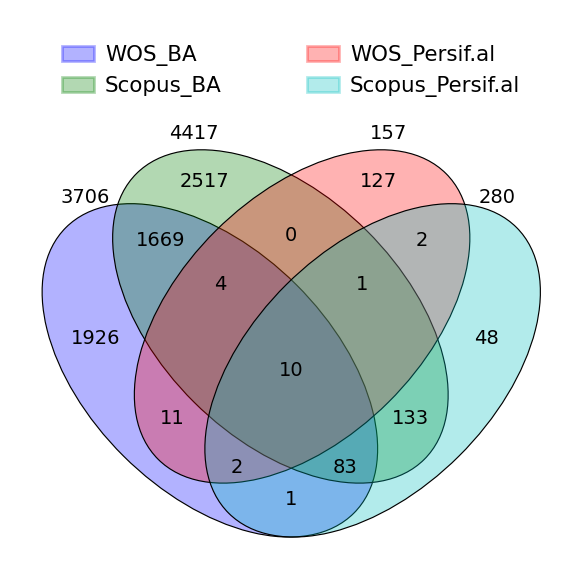

In [60]:
#dict of sets
sets = {
    'WOS_BA': set(df_WOS_primeira["Title"]),
    'Scopus_BA': set(df_Scopus_primeira["Title"]),
    'WOS_Persif.al': set(df10_Title["Title"]),
    'Scopus_Persif.al': set(df11_Title["Title"])}

venny4py(sets=sets)

### Ver quais títuls estão na intersecção e quais estão fora.

In [61]:
# Convert title columns to sets
set_WOS_primeira = set(df_WOS_primeira["Title"])
set_Scopus_primeira = set(df_Scopus_primeira["Title"])
set_WOS_Segunda = set(df10_Title["Title"])
set_Scopus_Segunda = set(df11_Title["Title"])

# Interseção completa
intersecao = set_WOS_primeira & set_Scopus_primeira & set_WOS_Segunda & set_Scopus_Segunda

# Exclusivos de cada conjunto
exclusivo_WOS_primeira = set_WOS_primeira - set_Scopus_primeira - set_WOS_Segunda - set_Scopus_Segunda
exclusivo_Scopus_primeira = set_Scopus_primeira - set_WOS_primeira - set_WOS_Segunda - set_Scopus_Segunda
exclusivo_WOS_Segunda = set_WOS_Segunda - set_WOS_primeira - set_Scopus_primeira - set_Scopus_Segunda
exclusivo_Scopus_Segunda = set_Scopus_Segunda - set_WOS_primeira - set_Scopus_primeira - set_WOS_Segunda

# Elementos fora da interseção completa
fora_da_intersecao = (set_WOS_primeira | set_Scopus_primeira | set_WOS_Segunda | set_Scopus_Segunda) - intersecao

# Função para exibir títulos numerados (unchanged)
def mostrar_titulos_numerados(titulos, categoria):
    print(f"{categoria}:")
    for i, titulo in enumerate(titulos, 1):
        print(f"{i}. {titulo}")
    print()

# Exibir os resultados numerados
mostrar_titulos_numerados(intersecao, "Títulos na interseção")
mostrar_titulos_numerados(exclusivo_WOS_primeira, "Títulos exclusivos do WOS_primeira")
mostrar_titulos_numerados(exclusivo_Scopus_primeira, "Títulos exclusivos do Scopus_primeira")
mostrar_titulos_numerados(exclusivo_WOS_Segunda, "Títulos exclusivos do WOS_Segunda")
mostrar_titulos_numerados(exclusivo_Scopus_Segunda, "Títulos exclusivos do Scopus_Segunda") # Corrected variable name
mostrar_titulos_numerados(fora_da_intersecao, "Títulos fora da interseção")

## Criar um dicionário com os dados
dados = {
    "Interseção": list(intersecao),
    "Exclusivo DF1": list(exclusivo_WOS_primeira),
    "Exclusivo DF2": list(exclusivo_Scopus_primeira),
    "Exclusivo DF3": list(exclusivo_WOS_Segunda),
    "Exclusivo DF4": list(exclusivo_Scopus_Segunda),
    "Fora da Interseção": list(fora_da_intersecao)
}

# Criar um DataFrame a partir do dicionário
df_resultado = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in dados.items()]))

# Exportar para um arquivo Excel
df_resultado.to_excel("resultado_intersecoes.xlsx", index=False)

print("Os resultados foram exportados para 'resultado_intersecoes.xlsx'.")

A saída de streaming foi truncada nas últimas 5000 linhas.
1527. THE DIEM PAYMENT SYSTEM - A FIRST ANALYSIS OF THE NEW WORLD CURRENCY
1528. ELIAS Project: Inclusive Finance for Latin American Migrants
1529. Effect of financial inclusion and fintech on the effectiveness of Indian monetary policy: an empirical investigation
1530. Food security and the COVID-19 employment shock in Nigeria: Any ex-ante mitigating effects of past remittances?
1531. Governance of microfinance institutions (MFIs): A case study of Bangladesh
1532. How mobile banking resistance behaviour affects financial inclusion in India?
1533. On the impact of the digital economy on urban resilience based on a spatial Durbin model
1534. Research on WeChat Marketing Strategy on the New Media Age
1535. Exploring the relationship between local institutions in SAT India and adaptation to climate variability
1536. LED advances accelerate universal access to electric lighting; [Les avancées dans le domaine des LED accélèrent l'ac

### Compara a primeira com a segunda

In [62]:
primeira_base = pd.concat([df_WOS_primeira, df_Scopus_primeira])
segunda_base = pd.concat([df10_Title, df11_Title])

print(primeira_base.head())
print(segunda_base.head())

                                               Title
1  The digital revolution in financial inclusion:...
2  Price Fluctuations and the Use of Bitcoin: An ...
3  Blockchain, adoption, and financial inclusion ...
4    Sustainability, FinTech and Financial Inclusion
5  Fintech, financial inclusion and income inequa...
                                               Title
0  Financial exclusion in Latin America - or the ...
1  Mobile-Banking Adoption and Usage by Low-Liter...
2  Financial Inclusion and Human Capital in Devel...
3  Inclusive Financial Markets: Is Transformation...
4  Triggers and barriers to financial inclusion: ...


In [63]:
# Conta valores únicos nas bases
primeira_base_count = primeira_base["Title"].unique()
segunda_base_count = segunda_base["Title"].unique()

print(f"Valores únicos na base WOS: {len(primeira_base)}")
print(f"Valores únicos na base Scopus: {len(segunda_base)}")

Valores únicos na base WOS: 10050
Valores únicos na base Scopus: 437


In [64]:
# Encontrar títulos iguais usando numpy
titulos_iguais_bases = np.intersect1d(primeira_base_count, segunda_base_count)

# Contar quantos títulos são iguais
numero_titulos_iguais_bases = len(titulos_iguais_bases)

print(f"Número de títulos iguais: {numero_titulos_iguais_bases}")

Número de títulos iguais: 245


### Gráfico de Venn

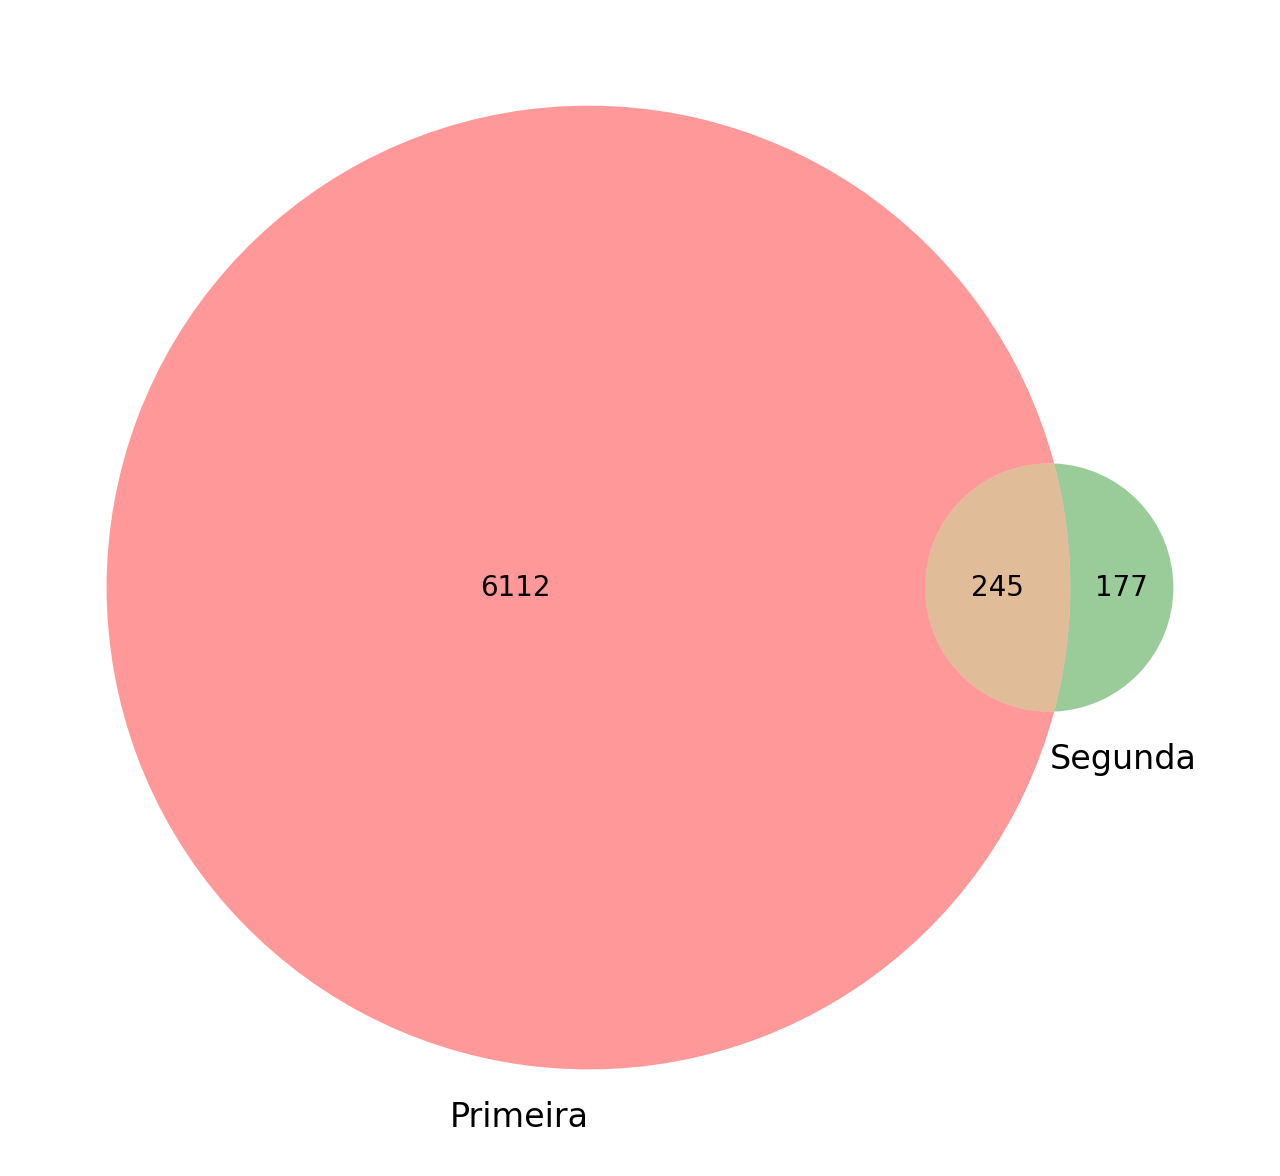

In [65]:
# Converter colunas em conjuntos de títulos únicos
setP = set(primeira_base_count)
setS = set(segunda_base_count)

# Criar o gráfico de Venn
plt.figure(figsize=(8, 8))
venn2([setP, setS], set_labels=('Primeira', 'Segunda'))

# Mostrar o gráfico
plt.show()

### Vendo quais são os artigos da intersecção.

In [66]:
# Interseção completa
intersecao_ps = setP & setS

# Exclusivos de cada conjunto
exclusivo_Primeira = setP - setS
exclusivo_Segunda = setS - setP

# Elementos fora da interseção completa
fora_da_intersecao_ps = (setP | setS) - intersecao_ps

# Função para exibir títulos numerados
def mostrar_titulos_numerados(titulos, categoria):
    print(f"{categoria}:")
    for i, titulo in enumerate(titulos, 1):
        print(f"{i}. {titulo}")
    print()

# Exibir os resultados numerados
mostrar_titulos_numerados(intersecao_ps, "Títulos na interseção")
mostrar_titulos_numerados(exclusivo_Primeira, "Títulos exclusivos da primeira análise de bibliográfica")
mostrar_titulos_numerados(exclusivo_Segunda, "Títulos exclusivos da segunda análise de bibliográfica")
mostrar_titulos_numerados(fora_da_intersecao_ps, "Títulos fora da interseção")

# Criar um dicionário com os dados
dados_ps = {
    "Interseção primeira e segunda análise": list(intersecao_ps),
    "Exclusivo primeira análise": list(exclusivo_Primeira),
    "Exclusivo segunda análise": list(exclusivo_Segunda),
    "Fora da Interseção": list(fora_da_intersecao_ps)
}

# Criar um DataFrame a partir do dicionário
df_resultado_ps = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in dados_ps.items()]))

# Exportar para um arquivo Excel
df_resultado_ps.to_excel("resultado_intersecoes_primeira_e_segunda_análise.xlsx", index=False)

print("Os resultados foram exportados para 'resultado_intersecoes_primeira_e_segunda_análise.xlsx'.")

A saída de streaming foi truncada nas últimas 5000 linhas.
1292. Financial Inclusion and Household Wellbeing in Namibia
1293. Europe in the digital age: regulating digital finance without suffocating innovation
1294. Role of Financial Inclusion in Human Development: Evidence from Bangladesh, India and Pakistan
1295. THE USE OF SOCIAL MEDIA IN BANKS TO ENGENDER THE EMPOWERMENT OF WOMEN AND THEIR FINANCIAL INCLUSION IN ARAB COUNTRIES
1296. The role of mobile money in improving the financial inclusion of Nairobi's urban poor
1297. Institutionalising future geographies of financial inclusion: National legitimacy versus local autonomy in the British credit union movement
1298. Competing Visions of Financial Inclusion in Kenya: The Rift Revealed by Mobile Money Transfer (vol 37, pg 83, 2016)
1299. Use of Digital Channels by Micro Loan Customers in India
1300. The Relevance of Financial Inclusion on Sustainable Economic Growth in Sub-Saharan African Nations
1301. The Association Between Finan